<a href="https://colab.research.google.com/github/jaimeisaac2020/Python-analsisis-basicos/blob/mi-github/hay_una_regresion_lineal_simple.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np

In [4]:
p=[1,2,2,-1,3,-4]

In [5]:
np.roots(p)

array([-1.56979911+1.27818164j, -1.56979911-1.27818164j,
        0.16678982+1.08773745j,  0.16678982-1.08773745j,
        0.80601858+0.j        ])

In [24]:
import scipy.optimize as op

In [49]:
def f(x): return x**5+2*x**4+2*x**3-x**2+3*x-4 
    

In [50]:
def fp(x): return 5*x**4+8*x**3+6*x**2-2*x+3

In [51]:
x0=1.5

In [52]:
f(1.5)

22.71875

In [53]:
op.newton(f,x0,fprime=fp,tol=0.00001)

0.8060185751615446

# Regresion lineal en Python.

In [1]:
import pandas as pd
import statsmodels.api as sm

data = {'year': [2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016],
        'month': [12,11,10,9,8,7,6,5,4,3,2,1,12,11,10,9,8,7,6,5,4,3,2,1],
        'interest_rate': [2.75,2.5,2.5,2.5,2.5,2.5,2.5,2.25,2.25,2.25,2,2,2,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75],
        'unemployment_rate': [5.3,5.3,5.3,5.3,5.4,5.6,5.5,5.5,5.5,5.6,5.7,5.9,6,5.9,5.8,6.1,6.2,6.1,6.1,6.1,5.9,6.2,6.2,6.1],
        'index_price': [1464,1394,1357,1293,1256,1254,1234,1195,1159,1167,1130,1075,1047,965,943,958,971,949,884,866,876,822,704,719]        
        }

df = pd.DataFrame(data) 

In [2]:
print(df)

    year  month  interest_rate  unemployment_rate  index_price
0   2017     12           2.75                5.3         1464
1   2017     11           2.50                5.3         1394
2   2017     10           2.50                5.3         1357
3   2017      9           2.50                5.3         1293
4   2017      8           2.50                5.4         1256
5   2017      7           2.50                5.6         1254
6   2017      6           2.50                5.5         1234
7   2017      5           2.25                5.5         1195
8   2017      4           2.25                5.5         1159
9   2017      3           2.25                5.6         1167
10  2017      2           2.00                5.7         1130
11  2017      1           2.00                5.9         1075
12  2016     12           2.00                6.0         1047
13  2016     11           1.75                5.9          965
14  2016     10           1.75                5.8      

In [3]:
x = df[['interest_rate','unemployment_rate']]
y = df['index_price']


In [5]:
x = sm.add_constant(x)
print(x)

    const  interest_rate  unemployment_rate
0     1.0           2.75                5.3
1     1.0           2.50                5.3
2     1.0           2.50                5.3
3     1.0           2.50                5.3
4     1.0           2.50                5.4
5     1.0           2.50                5.6
6     1.0           2.50                5.5
7     1.0           2.25                5.5
8     1.0           2.25                5.5
9     1.0           2.25                5.6
10    1.0           2.00                5.7
11    1.0           2.00                5.9
12    1.0           2.00                6.0
13    1.0           1.75                5.9
14    1.0           1.75                5.8
15    1.0           1.75                6.1
16    1.0           1.75                6.2
17    1.0           1.75                6.1
18    1.0           1.75                6.1
19    1.0           1.75                6.1
20    1.0           1.75                5.9
21    1.0           1.75        

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [7]:
model = sm.OLS(y, x).fit()
print(model)

In [8]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            index_price   R-squared:                       0.898
Model:                            OLS   Adj. R-squared:                  0.888
Method:                 Least Squares   F-statistic:                     92.07
Date:                Sat, 19 Nov 2022   Prob (F-statistic):           4.04e-11
Time:                        23:45:10   Log-Likelihood:                -134.61
No. Observations:                  24   AIC:                             275.2
Df Residuals:                      21   BIC:                             278.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              1798.4040    899.248      2.000      0.059     -71.685    3668.493
interest_rate       345.5401    111.367      3.103      0.005     113.940     577.140
unemployment_rate  -250.1466    117.950     -2.121      0.046    -495.437      -4.856
==============================================================================
Omnibus:                        2.691   Durbin-Watson:                   0.530
Prob(Omnibus):                  0.260   Jarque-Bera (JB):                1.551
Skew:                          -0.612   Prob(JB):                        0.461
Kurtosis:                       3.226   Cond. No.                         394.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [10]:
predictions = model.predict(x)
predictions 

0     1422.862389
1     1336.477367
2     1336.477367
3     1336.477367
4     1311.462710
5     1261.433395
6     1286.448053
7     1200.063031
8     1200.063031
9     1175.048374
10    1063.648695
11    1013.619381
12     988.604723
13     927.234359
14     952.249016
15     877.205045
16     852.190387
17     877.205045
18     877.205045
19     877.205045
20     927.234359
21     852.190387
22     852.190387
23     877.205045
dtype: float64

In [16]:
datan=pd.DataFrame({
    'const':[1.0],
    'interest_rate':[2.45],
    'unemployment_rate':[5.2]
})

In [17]:
model.predict(datan)

0    1344.21502
dtype: float64

In [18]:
datan=pd.DataFrame({
    'const':[1.0],
    'interest_rate':[1.75],
    'unemployment_rate':[6.1]
})

In [19]:
model.predict(datan)

0    877.205045
dtype: float64

In [21]:
model.ssr

104558.67257095508

In [22]:
model.params

const                1798.403978
interest_rate         345.540087
unemployment_rate    -250.146571
dtype: float64

In [23]:
import pandas as pd

data = {'year': [2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016],
        'month': [12,11,10,9,8,7,6,5,4,3,2,1,12,11,10,9,8,7,6,5,4,3,2,1],
        'interest_rate': [2.75,2.5,2.5,2.5,2.5,2.5,2.5,2.25,2.25,2.25,2,2,2,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75],
        'unemployment_rate': [5.3,5.3,5.3,5.3,5.4,5.6,5.5,5.5,5.5,5.6,5.7,5.9,6,5.9,5.8,6.1,6.2,6.1,6.1,6.1,5.9,6.2,6.2,6.1],
        'index_price': [1464,1394,1357,1293,1256,1254,1234,1195,1159,1167,1130,1075,1047,965,943,958,971,949,884,866,876,822,704,719]        
        }

df = pd.DataFrame(data) 

print(df)

    year  month  interest_rate  unemployment_rate  index_price
0   2017     12           2.75                5.3         1464
1   2017     11           2.50                5.3         1394
2   2017     10           2.50                5.3         1357
3   2017      9           2.50                5.3         1293
4   2017      8           2.50                5.4         1256
5   2017      7           2.50                5.6         1254
6   2017      6           2.50                5.5         1234
7   2017      5           2.25                5.5         1195
8   2017      4           2.25                5.5         1159
9   2017      3           2.25                5.6         1167
10  2017      2           2.00                5.7         1130
11  2017      1           2.00                5.9         1075
12  2016     12           2.00                6.0         1047
13  2016     11           1.75                5.9          965
14  2016     10           1.75                5.8      

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


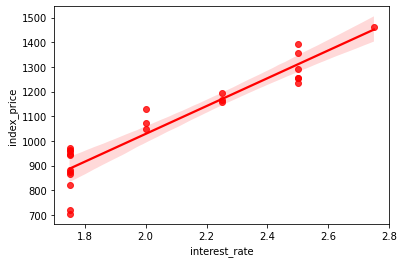

In [31]:
sns.regplot(df['interest_rate'], df['index_price'], color='red')
plt.show()

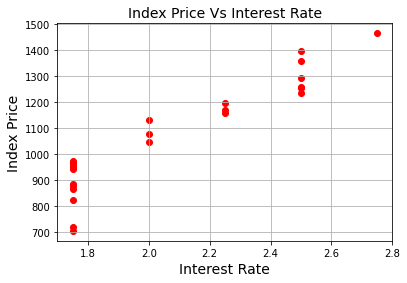

In [32]:
plt.scatter(df['interest_rate'], df['index_price'], color='red')
plt.title('Index Price Vs Interest Rate', fontsize=14)
plt.xlabel('Interest Rate', fontsize=14)
plt.ylabel('Index Price', fontsize=14)
plt.grid(True)
plt.show()

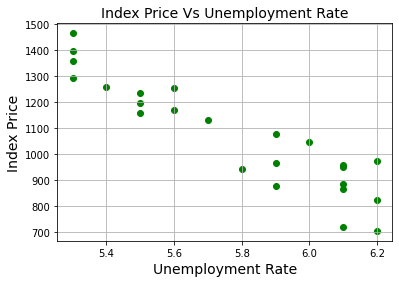

In [33]:
plt.scatter(df['unemployment_rate'], df['index_price'], color='green')
plt.title('Index Price Vs Unemployment Rate', fontsize=14)
plt.xlabel('Unemployment Rate', fontsize=14)
plt.ylabel('Index Price', fontsize=14)
plt.grid(True)
plt.show()

In [35]:
from sklearn import linear_model

In [36]:
x = df[['interest_rate','unemployment_rate']]
y = df['index_price']
 
# with sklearn
regr = linear_model.LinearRegression()
regr.fit(x, y)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

Intercept: 
 1798.4039776258544
Coefficients: 
 [ 345.54008701 -250.14657137]


In [38]:
regr

LinearRegression()

In [41]:
modelo=regr.fit(x,y)

In [47]:
x.head()

,interest_rate,unemployment_rate
0,2.75,5.3
1,2.50,5.3
2,2.50,5.3
3,2.50,5.3
4,2.50,5.4


In [42]:
modelo.intercept_

1798.4039776258544

In [54]:
dan=pd.DataFrame({
 'interest_rate':[1.75]	,
 'unemployment_rate':[6.1] 
})

In [55]:
modelo.predict(dan)

array([877.20504454])

In [56]:
# with statsmodels
x = sm.add_constant(x) # adding a constant
 
model = sm.OLS(y, x).fit()
predictions = model.predict(x) 
 
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:            index_price   R-squared:                       0.898
Model:                            OLS   Adj. R-squared:                  0.888
Method:                 Least Squares   F-statistic:                     92.07
Date:                Sun, 20 Nov 2022   Prob (F-statistic):           4.04e-11
Time:                        00:13:55   Log-Likelihood:                -134.61
No. Observations:                  24   AIC:                             275.2
Df Residuals:                      21   BIC:                             278.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              1798.4040    899.24

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [61]:
dan=pd.DataFrame({
    'constant':[1.0],
 'interest_rate':[1.75]	,
 'unemployment_rate':[6.1] 
})

In [62]:
model.predict(dan)

0    877.205045
dtype: float64